In [ ]:
#Import the system module to be able to install other libraries
import sys
#Installs Textblob
!{sys.executable} -m pip install textblob
#Installs VADER
!{sys.executable} -m pip install vaderSentiment
#Installs rpy2
!{sys.executable} -m pip install rpy2

In [1]:
import os
#Import VADER sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vaderanalyzer = SentimentIntensityAnalyzer()
#Import Textblob
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer
#Import Pandas to be able to create tables of data
import pandas as pd
import rpy2

In [2]:
sentences = ["What I meant was that it was chilling, horrible, disgusting, and the meanest thing in the world -- only I couldn’t say that in front of a little baby.", "Something cold and slimy and disgusting and icky touched my neck and then wriggled beneath the collar of my shirt and down my spine.", "I was expecting some disgusting vegetarian substitute.", "As bad as Saturday night was, Sunday morning was just awful.", "He looked awful, as if he’d been crying for hours.", "Isn’t prejudice awful?", "It’s just that I found out the most terrible thing.", "I felt terrible: terrible about the lie, terrible about how badly I had handled the whole thing.", "Playing Monopoly with anybody can be a slow and torturous experience, but with Charlotte it’s the absolute worst.", "It was her worst baby-sitting experience ever.", "We made an awesome pasta dish, with sun-dried tomatoes and basil.", "The show is going to be awesome.", "You’re a wonderful big sister and a big help to your mommy and daddy.", "Richard is a wonderful stepdad, and Mary Anne is the best.", "When I got to California, I had an absolutely fantastic time.", "And Logan scored a touchdown, which was so fantastic.", "This is the best job in the world.", "She is the best listener and the most loyal friend.", "Suddenly I had a great stepmom, a great stepsister, and a great new house.", "We can get great ice-cream sundaes at Friendly's."]

In [3]:
sentencesdf = pd.DataFrame(sentences, columns =['sentence'])
sentencesdf

,sentence
0,"What I meant was that it was chilling, horribl..."
1,Something cold and slimy and disgusting and ic...
2,I was expecting some disgusting vegetarian sub...
3,"As bad as Saturday night was, Sunday morning w..."
4,"He looked awful, as if he’d been crying for ho..."
5,Isn’t prejudice awful?
6,It’s just that I found out the most terrible t...
7,"I felt terrible: terrible about the lie, terri..."
8,Playing Monopoly with anybody can be a slow an...
9,It was her worst baby-sitting experience ever.


In [4]:
sentencesdf['tbsentiment'] = sentencesdf['sentence'].apply(lambda sentence: TextBlob(sentence).sentiment[0])
sentencesdf['vadersentiment'] = [vaderanalyzer.polarity_scores(x)['compound'] for x in sentencesdf['sentence']]
sentencesdf['vader-neg'] = [vaderanalyzer.polarity_scores(x)['neg'] for x in sentencesdf['sentence']]
sentencesdf['vader-neu'] = [vaderanalyzer.polarity_scores(x)['neu'] for x in sentencesdf['sentence']]
sentencesdf['vader-pos'] = [vaderanalyzer.polarity_scores(x)['pos'] for x in sentencesdf['sentence']]

sentencesdf

,sentence,tbsentiment,vadersentiment,vader-neg,vader-neu,vader-pos
0,"What I meant was that it was chilling, horribl...",-0.537500,-0.7906,0.235,0.765,0.000
1,Something cold and slimy and disgusting and ic...,-0.513889,-0.5267,0.129,0.871,0.000
2,I was expecting some disgusting vegetarian sub...,-1.000000,-0.5267,0.362,0.638,0.000
3,"As bad as Saturday night was, Sunday morning w...",-0.850000,-0.7579,0.419,0.581,0.000
4,"He looked awful, as if he’d been crying for ho...",-0.600000,-0.7269,0.433,0.567,0.000
5,Isn’t prejudice awful?,-1.000000,-0.7430,0.863,0.137,0.000
6,It’s just that I found out the most terrible t...,-0.250000,-0.5256,0.274,0.726,0.000
7,"I felt terrible: terrible about the lie, terri...",-0.700000,-0.9081,0.488,0.512,0.000
8,Playing Monopoly with anybody can be a slow an...,-0.366667,-0.8225,0.328,0.615,0.057
9,It was her worst baby-sitting experience ever.,-1.000000,-0.6249,0.406,0.594,0.000


In [5]:
prejudice = "I think it's prejudice."
blob = TextBlob(prejudice, analyzer=PatternAnalyzer())
print(blob.sentiment)
print(vaderanalyzer.polarity_scores(prejudice))

Sentiment(polarity=0.0, subjectivity=0.0)
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


In [6]:
potato = "The teenagers around here get their own cars (fancy ones) as soon as they’re able to drive."
blob = TextBlob(potato, analyzer=PatternAnalyzer())
print(blob.sentiment)
print(vaderanalyzer.polarity_scores(potato))

Sentiment(polarity=0.55, subjectivity=0.8125)
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [7]:
potato = "Well, it's like a potato."
blob = TextBlob(potato, analyzer=PatternAnalyzer())
print(blob.sentiment)
print(vaderanalyzer.polarity_scores(potato))

Sentiment(polarity=0.0, subjectivity=0.0)
{'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'compound': 0.5574}


In [8]:
snobpara1 = ["If there’s one thing I can’t stand, it’s a snob.",  "Well, actually, there are a lot of other things I can’t stand.", "Cabbage, blood, people who chew with their mouths open, and squirrels are a few of them.", "But snobs are way up there on the list."]

In [9]:
snobpara1df = pd.DataFrame(snobpara1, columns =['sentence'])
snobpara1df

,sentence
0,"If there’s one thing I can’t stand, it’s a snob."
1,"Well, actually, there are a lot of other thing..."
2,"Cabbage, blood, people who chew with their mou..."
3,But snobs are way up there on the list.


In [10]:
snobpara1df['tbsentiment'] = snobpara1df['sentence'].apply(lambda sentence: TextBlob(sentence).sentiment[0])
snobpara1df['vadersentiment'] = [vaderanalyzer.polarity_scores(x)['compound'] for x in snobpara1df['sentence']]
snobpara1df['vader-neg'] = [vaderanalyzer.polarity_scores(x)['neg'] for x in snobpara1df['sentence']]
snobpara1df['vader-neu'] = [vaderanalyzer.polarity_scores(x)['neu'] for x in snobpara1df['sentence']]
snobpara1df['vader-pos'] = [vaderanalyzer.polarity_scores(x)['pos'] for x in snobpara1df['sentence']]

snobpara1df

,sentence,tbsentiment,vadersentiment,vader-neg,vader-neu,vader-pos
0,"If there’s one thing I can’t stand, it’s a snob.",0.0000,-0.4588,0.250,0.750,0.00
1,"Well, actually, there are a lot of other thing...",-0.0625,0.2732,0.000,0.840,0.16
2,"Cabbage, blood, people who chew with their mou...",-0.1000,0.0000,0.000,1.000,0.00
3,But snobs are way up there on the list.,0.0000,-0.4767,0.279,0.721,0.00


In [11]:
snobpara2 = ["Anyway, to get back to the snobs — I’m surrounded.", "They’re everywhere in Watson’s neighborhood.", "The teenagers around here get their own cars (fancy ones) as soon as they’re able to drive.", "They spin along with the radios blaring, looking fresh and sophisticated.", "I am so glad my big brothers, Sam and Charlie, aren’t like that.", "Charlie can drive now, but the only thing he drives is Mom’s beat-up station wagon.", "And my brothers and I still go to public school, not to snobby private schools.", "Guess what most families on our street have: (a) a swimming pool (b) tennis courts (c) a cook named Agnes (d) all of the above.", "The answer is (d) all of the above."]

snobpara2df = pd.DataFrame(snobpara2, columns =['sentence'])

snobpara2df['tbsentiment'] = snobpara2df['sentence'].apply(lambda sentence: TextBlob(sentence).sentiment[0])
snobpara2df['vadersentiment'] = [vaderanalyzer.polarity_scores(x)['compound'] for x in snobpara2df['sentence']]
snobpara2df['vader-neg'] = [vaderanalyzer.polarity_scores(x)['neg'] for x in snobpara2df['sentence']]
snobpara2df['vader-neu'] = [vaderanalyzer.polarity_scores(x)['neu'] for x in snobpara2df['sentence']]
snobpara2df['vader-pos'] = [vaderanalyzer.polarity_scores(x)['pos'] for x in snobpara2df['sentence']]

snobpara2df

,sentence,tbsentiment,vadersentiment,vader-neg,vader-neu,vader-pos
0,"Anyway, to get back to the snobs — I’m surroun...",0.000000,-0.3400,0.211,0.789,0.000
1,They’re everywhere in Watson’s neighborhood.,0.000000,0.0000,0.000,1.000,0.000
2,The teenagers around here get their own cars (...,0.550000,0.0000,0.000,1.000,0.000
3,"They spin along with the radios blaring, looki...",0.400000,0.7096,0.000,0.604,0.396
4,"I am so glad my big brothers, Sam and Charlie,...",0.250000,0.7481,0.000,0.633,0.367
5,"Charlie can drive now, but the only thing he d...",0.000000,0.0000,0.000,1.000,0.000
6,And my brothers and I still go to public schoo...,0.000000,0.3089,0.000,0.861,0.139
7,Guess what most families on our street have: (...,-0.083333,0.0000,0.000,1.000,0.000
8,The answer is (d) all of the above.,0.000000,0.0000,0.000,1.000,0.000


In [12]:
import rpy2
#import rpy2.situation
%load_ext rpy2.ipython

In [13]:
%%R
rsentences <-list("What I meant was that it was chilling, horrible, disgusting, and the meanest thing in the world -- only I couldn’t say that in front of a little baby.", "Something cold and slimy and disgusting and icky touched my neck and then wriggled beneath the collar of my shirt and down my spine.", "I was expecting some disgusting vegetarian substitute.", "As bad as Saturday night was, Sunday morning was just awful.", "He looked awful, as if he’d been crying for hours.", "Isn’t prejudice awful?", "It’s just that I found out the most terrible thing.", "I felt terrible: terrible about the lie, terrible about how badly I had handled the whole thing.", "Playing Monopoly with anybody can be a slow and torturous experience, but with Charlotte it’s the absolute worst.", "It was her worst baby-sitting experience ever.", "We made an awesome pasta dish, with sun-dried tomatoes and basil.", "The show is going to be awesome.", "You’re a wonderful big sister and a big help to your mommy and daddy.", "Richard is a wonderful stepdad, and Mary Anne is the best.", "When I got to California, I had an absolutely fantastic time.", "And Logan scored a touchdown, which was so fantastic.", "This is the best job in the world.", "She is the best listener and the most loyal friend.", "Suddenly I had a great stepmom, a great stepsister, and a great new house.", "We can get great ice-cream sundaes at Friendly's.")

In [14]:
%Rpush sentences

In [15]:
%%R
sentences

 [1]

 "What I meant was that it was chilling, horrible, disgusting, and the meanest thing in the world -- only I couldn’t say that in front of a little baby."

 [2]

 "Something cold and slimy and disgusting and icky touched my neck and then wriggled beneath the collar of my shirt and down my spine."                  

 [3]

 "I was expecting some disgusting vegetarian substitute."                                                                                                

 [4]

 "As bad as Saturday night was, Sunday morning was just awful."                                                                                          

 [5]

 "He looked awful, as if he’d been crying for hours."                                                                                                    

 [6]

 "Isn’t prejudice awful?"                                                                                                                                

 [7]

 "It’s just that I found out the most terrible thing."                                                                                                   

 [8]

 "I felt terrible: terrible about the lie, terrible about how badly I had handled the whole thing."                                                      

 [9]

 "Playing Monopoly with anybody can be a slow and torturous experience, but with Charlotte it’s the absolute worst."                                     

[10]

 "It was her worst baby-sitting experience ever."                                                                                                        

[11]

 "We made an awesome pasta dish, with sun-dried tomatoes and basil."                                                                                     

[12]

 "The show is going to be awesome."                                                                                                                      

[13]

 "You’re a wonderful big sister and a big help to your mommy and daddy."                                                                                 

[14]

 "Richard is a wonderful stepdad, and Mary Anne is the best."                                                                                            

[15]

 "When I got to California, I had an absolutely fantastic time."                                                                                         

[16]

 "And Logan scored a touchdown, which was so fantastic."                                                                                                 

[17]

 "This is the best job in the world."                                                                                                                    

[18]

 "She is the best listener and the most loyal friend."                                                                                                   

[19]

 "Suddenly I had a great stepmom, a great stepsister, and a great new house."                                                                            

[20]

 "We can get great ice-cream sundaes at Friendly's."                                                                                                     

In [16]:
%%R
sentences <- unlist(sentences)

sentences

 [1]

 "What I meant was that it was chilling, horrible, disgusting, and the meanest thing in the world -- only I couldn’t say that in front of a little baby."

 [2]

 "Something cold and slimy and disgusting and icky touched my neck and then wriggled beneath the collar of my shirt and down my spine."                  

 [3]

 "I was expecting some disgusting vegetarian substitute."                                                                                                

 [4]

 "As bad as Saturday night was, Sunday morning was just awful."                                                                                          

 [5]

 "He looked awful, as if he’d been crying for hours."                                                                                                    

 [6]

 "Isn’t prejudice awful?"                                                                                                                                

 [7]

 "It’s just that I found out the most terrible thing."                                                                                                   

 [8]

 "I felt terrible: terrible about the lie, terrible about how badly I had handled the whole thing."                                                      

 [9]

 "Playing Monopoly with anybody can be a slow and torturous experience, but with Charlotte it’s the absolute worst."                                     

[10]

 "It was her worst baby-sitting experience ever."                                                                                                        

[11]

 "We made an awesome pasta dish, with sun-dried tomatoes and basil."                                                                                     

[12]

 "The show is going to be awesome."                                                                                                                      

[13]

 "You’re a wonderful big sister and a big help to your mommy and daddy."                                                                                 

[14]

 "Richard is a wonderful stepdad, and Mary Anne is the best."                                                                                            

[15]

 "When I got to California, I had an absolutely fantastic time."                                                                                         

[16]

 "And Logan scored a touchdown, which was so fantastic."                                                                                                 

[17]

 "This is the best job in the world."                                                                                                                    

[18]

 "She is the best listener and the most loyal friend."                                                                                                   

[19]

 "Suddenly I had a great stepmom, a great stepsister, and a great new house."                                                                            

[20]

 "We can get great ice-cream sundaes at Friendly's."                                                                                                     

In [17]:
%%R
library(syuzhet)

In [18]:
%%R
sentences_syuzhet <- get_sentiment(sentences, method="syuzhet")
sentences_bing <- get_sentiment(sentences, method="bing")
sentences_afinn <- get_sentiment(sentences, method="afinn")
sentences_nrc <- get_sentiment(sentences, method="nrc")

In [19]:
%%R
sentences_syuzhet

 [1]

 -2.55

 -3.05

 -1.00

 -1.50

 -1.25

 -1.25

 -0.15

 -2.00

 -2.00

 -0.50

  0.60

  0.60

[13]

  1.00

  1.25

  0.75

  0.75

  0.50

  2.30

  1.30

  0.50

In [20]:
%%R
sentences_bing

 [1]

 -2

 -2

 -1

 -2

 -1

 -2

 -1

 -3

 -3

 -1

  1

  1

  1

  2

  1

  1

  1

  2

  1

  1

In [21]:
%%R
sentences_afinn

 [1]

 -7

 -6

 -3

 -6

 -5

 -3

 -3

 -6

 -3

 -3

  4

  4

  7

  7

  4

  4

  3

  7

  3

  3

In [22]:
%%R
sentences_nrc

 [1]

 -1

 -4

 -1

 -2

 -2

 -2

  0

 -3

  1

  1

  1

  0

  1

  1

  0

  0

  1

  2

  0

  1

In [23]:
%%R
setwd('/Users/qad/Documents/dsc/dsc_corpus_syuzhet')

In [ ]:
%%R
library(syuzhet)

files <- list.files('.', pattern = "txt")
for (file in files) {
book <- get_text_as_string(file)
booksentences <- get_sentences(book)
#Other methods are 'syuzhet', 'bing', 'afinn', 'nrc'
syuzhet_vector <- get_sentiment(booksentences, method="syuzhet")
outputname <- paste(file, "-plotonly.jpg")
jpeg(file=outputname)
plot(syuzhet_vector, type = "h", main=file, xlab = 'time', ylab = 'emotion', col = 'red')
dev.off()
}

In [ ]:
%%R
library(syuzhet)

#Creates a list of all the files in the current directory
files <- list.files('.', pattern = "txt")
#For each file in the directory...
for (file in files) {
#Reads the file's contents into a string
book <- get_text_as_string(file)
#Breaks the string into sentences
booksentences <- get_sentences(book)
#Does the sentiment scores for each sentence, using the default 'syuzhet' lexicon
syuzhet_vector <- get_sentiment(booksentences, method="syuzhet")
#Creates an output filename for the plot image
outputname <- paste(file, "-simpleplot.jpg")
#Creates an empty image file for the plot image
jpeg(file=outputname, width = 2400, height = 800)
#Generates the plot
simple_plot(syuzhet_vector)
#Saves the plot to the image file
dev.off()
}

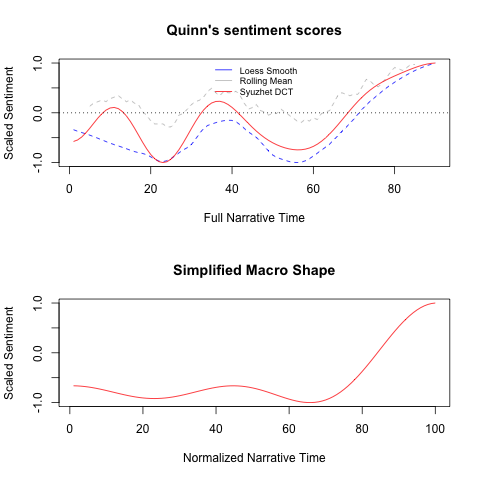

In [24]:
%%R

katia <- c(2, 1, 7, 2, 4, 1, 3, 7, 6, 2, 6, 3, 2, 8, 10, 6, 2, 5, 7, 5, 4, 1, 6, 2, 1, 6, 8, 4, 5, 7, 5, 3, 4, 5, 5, 5, 5, 6, 4, 3, 2, 1, 5, 3, 2, 9, 4, 1, 4, 6, 3, 2, 1, 6, 3, 2, 7, 3, 2, 1, 4, 3, 6, 6, 6, 6, 3, 1, 7, 6, 7, 7, 4, 3, 8, 7, 5, 5, 5, 2, 6, 8, 7, 9, 3, 6, 7, 7, 7, 7)
simple_plot(katia, title="Katia's sentiment scores")
quinn <- c(3, 5, 3, 7, 3, 4, 3, 5, 5, 5, 6, 4, 6, 5, 5, 4, 3, 3, 6, 4, 3, 1, 3, 1, 2, 3, 3, 4, 4, 6, 6, 4, 4, 5, 5, 4, 6, 8, 8, 3, 2, 7, 4, 5, 5, 3, 3, 4, 4, 4, 3, 3, 3, 6, 3, 6, 2, 2, 2, 1, 2, 5, 5, 5, 5, 6, 3, 3, 6, 7, 7, 4, 4, 6, 6, 8, 8, 5, 4, 6, 7, 7, 10, 9, 7, 7, 7, 6, 6, 8)
simple_plot(quinn, title="Quinn's sentiment scores")

In [25]:
#Used for listing files in a directory
import os
#Used to split up text into sentences
from nltk import tokenize
#Used to make random selection
import random

In [ ]:
#Creates an empty list for the sentences
bsc_sentences = []
#For each filename in the current directory...
#Remember that we used R to change directories to where the corpus is
#If you need to do this in Python, you can run os.chdir('/some/directory/path') first
for filename in os.listdir('.'):
    #If the file is a text file
    if filename.endswith('.txt'):
        #Open it
        with open(filename, 'r') as f:
            #Read it
            text = f.read()
            #Replace newlines with spaces
            text = text.replace('\n', ' ')
            #Split the text up into sentences
            sentences = tokenize.sent_tokenize(text)
            #For each sentences in the list of sentences
            for sentence in sentences:
                #Add the sentence to the list of sentences
                bsc_sentences.append(sentence)

#Define a random sample of 2000 sentences from the list of sentences
random_sentences = random.sample(bsc_sentences, 2000)

#Open the output file
with open('bsc-sentences.csv', 'w') as out:
    #For each sentence
    for random_sentence in random_sentences:
        #Write it to the output file
        out.write(random_sentence)
        #Write a newline character
        out.write('\n')